In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("../products_campaign_sales.csv")
df.head()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140,0.83,93,888,1981
1,0,0,0,1,1,0.10,144,0.75,150,836,986
2,0,1,1,1,1,0.12,149,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146,0.59,73,1456,1529


In [3]:
df.describe()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.042408,2.997264,0.683995,1.395349,4.952120,0.474337,162.366621,0.809617,848.176471,3696.391245,4531.079343
std,0.404911,2.004787,0.465233,0.544894,1.838449,0.162913,16.595747,0.077679,686.622488,1908.643139,1932.532346
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.080000,0.000000,0.490000,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.340000,152.000000,0.770000,315.500000,2497.000000,3199.000000
50%,0.000000,3.000000,1.000000,1.000000,5.000000,0.490000,163.000000,0.820000,713.000000,3662.000000,4563.000000
75%,0.000000,5.000000,1.000000,2.000000,7.000000,0.610000,173.000000,0.870000,1096.000000,4795.500000,6011.500000
max,10.000000,6.000000,1.000000,3.000000,9.000000,0.840000,197.000000,0.980000,3410.000000,33380.000000,8714.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      731 non-null    int64  
 1   campaign_type    731 non-null    int64  
 2   campaign_level   731 non-null    int64  
 3   product_level    731 non-null    int64  
 4   resource_amount  731 non-null    int64  
 5   email_rate       731 non-null    float64
 6   price            731 non-null    int64  
 7   discount_rate    731 non-null    float64
 8   hour_resouces    731 non-null    int64  
 9   campaign_fee     731 non-null    int64  
 10  orders           731 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 62.9 KB


In [5]:
df.isnull().sum()

limit_infor        0
campaign_type      0
campaign_level     0
product_level      0
resource_amount    0
email_rate         0
price              0
discount_rate      0
hour_resouces      0
campaign_fee       0
orders             0
dtype: int64

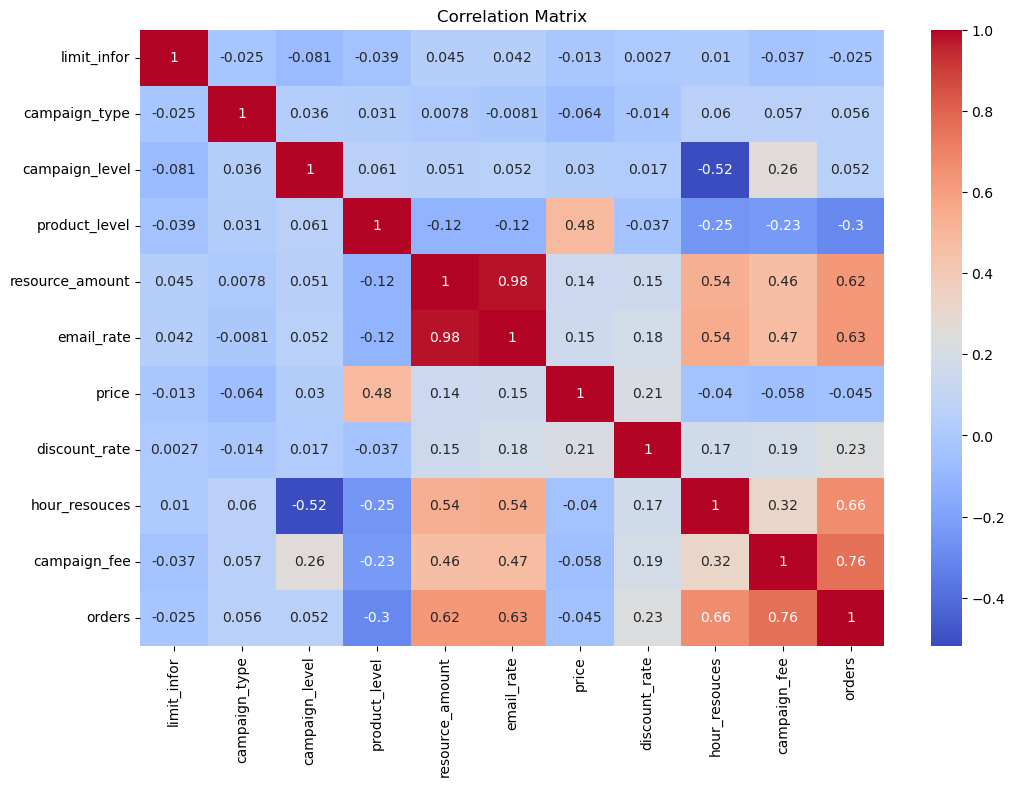

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

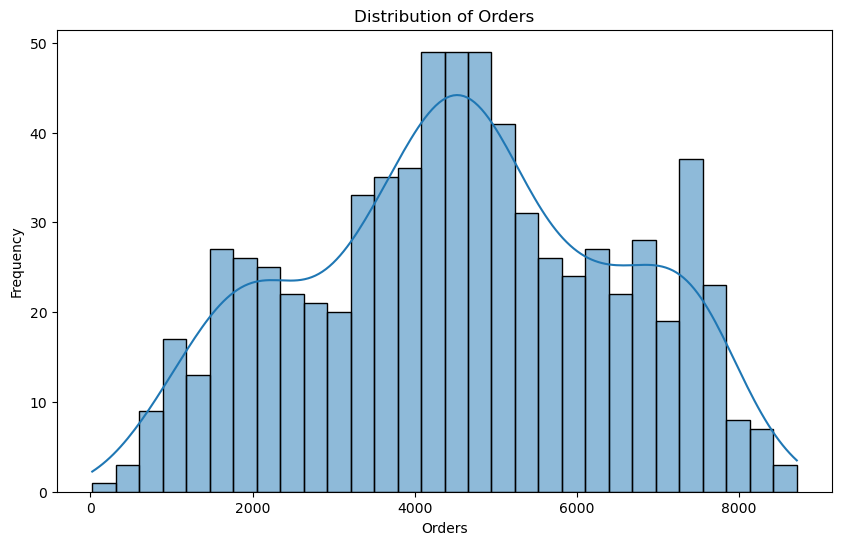

In [7]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['orders'], kde=True, bins=30)
plt.title('Distribution of Orders')
plt.xlabel('Orders')
plt.ylabel('Frequency')
plt.show()

C:\Users\Mohmad Adil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

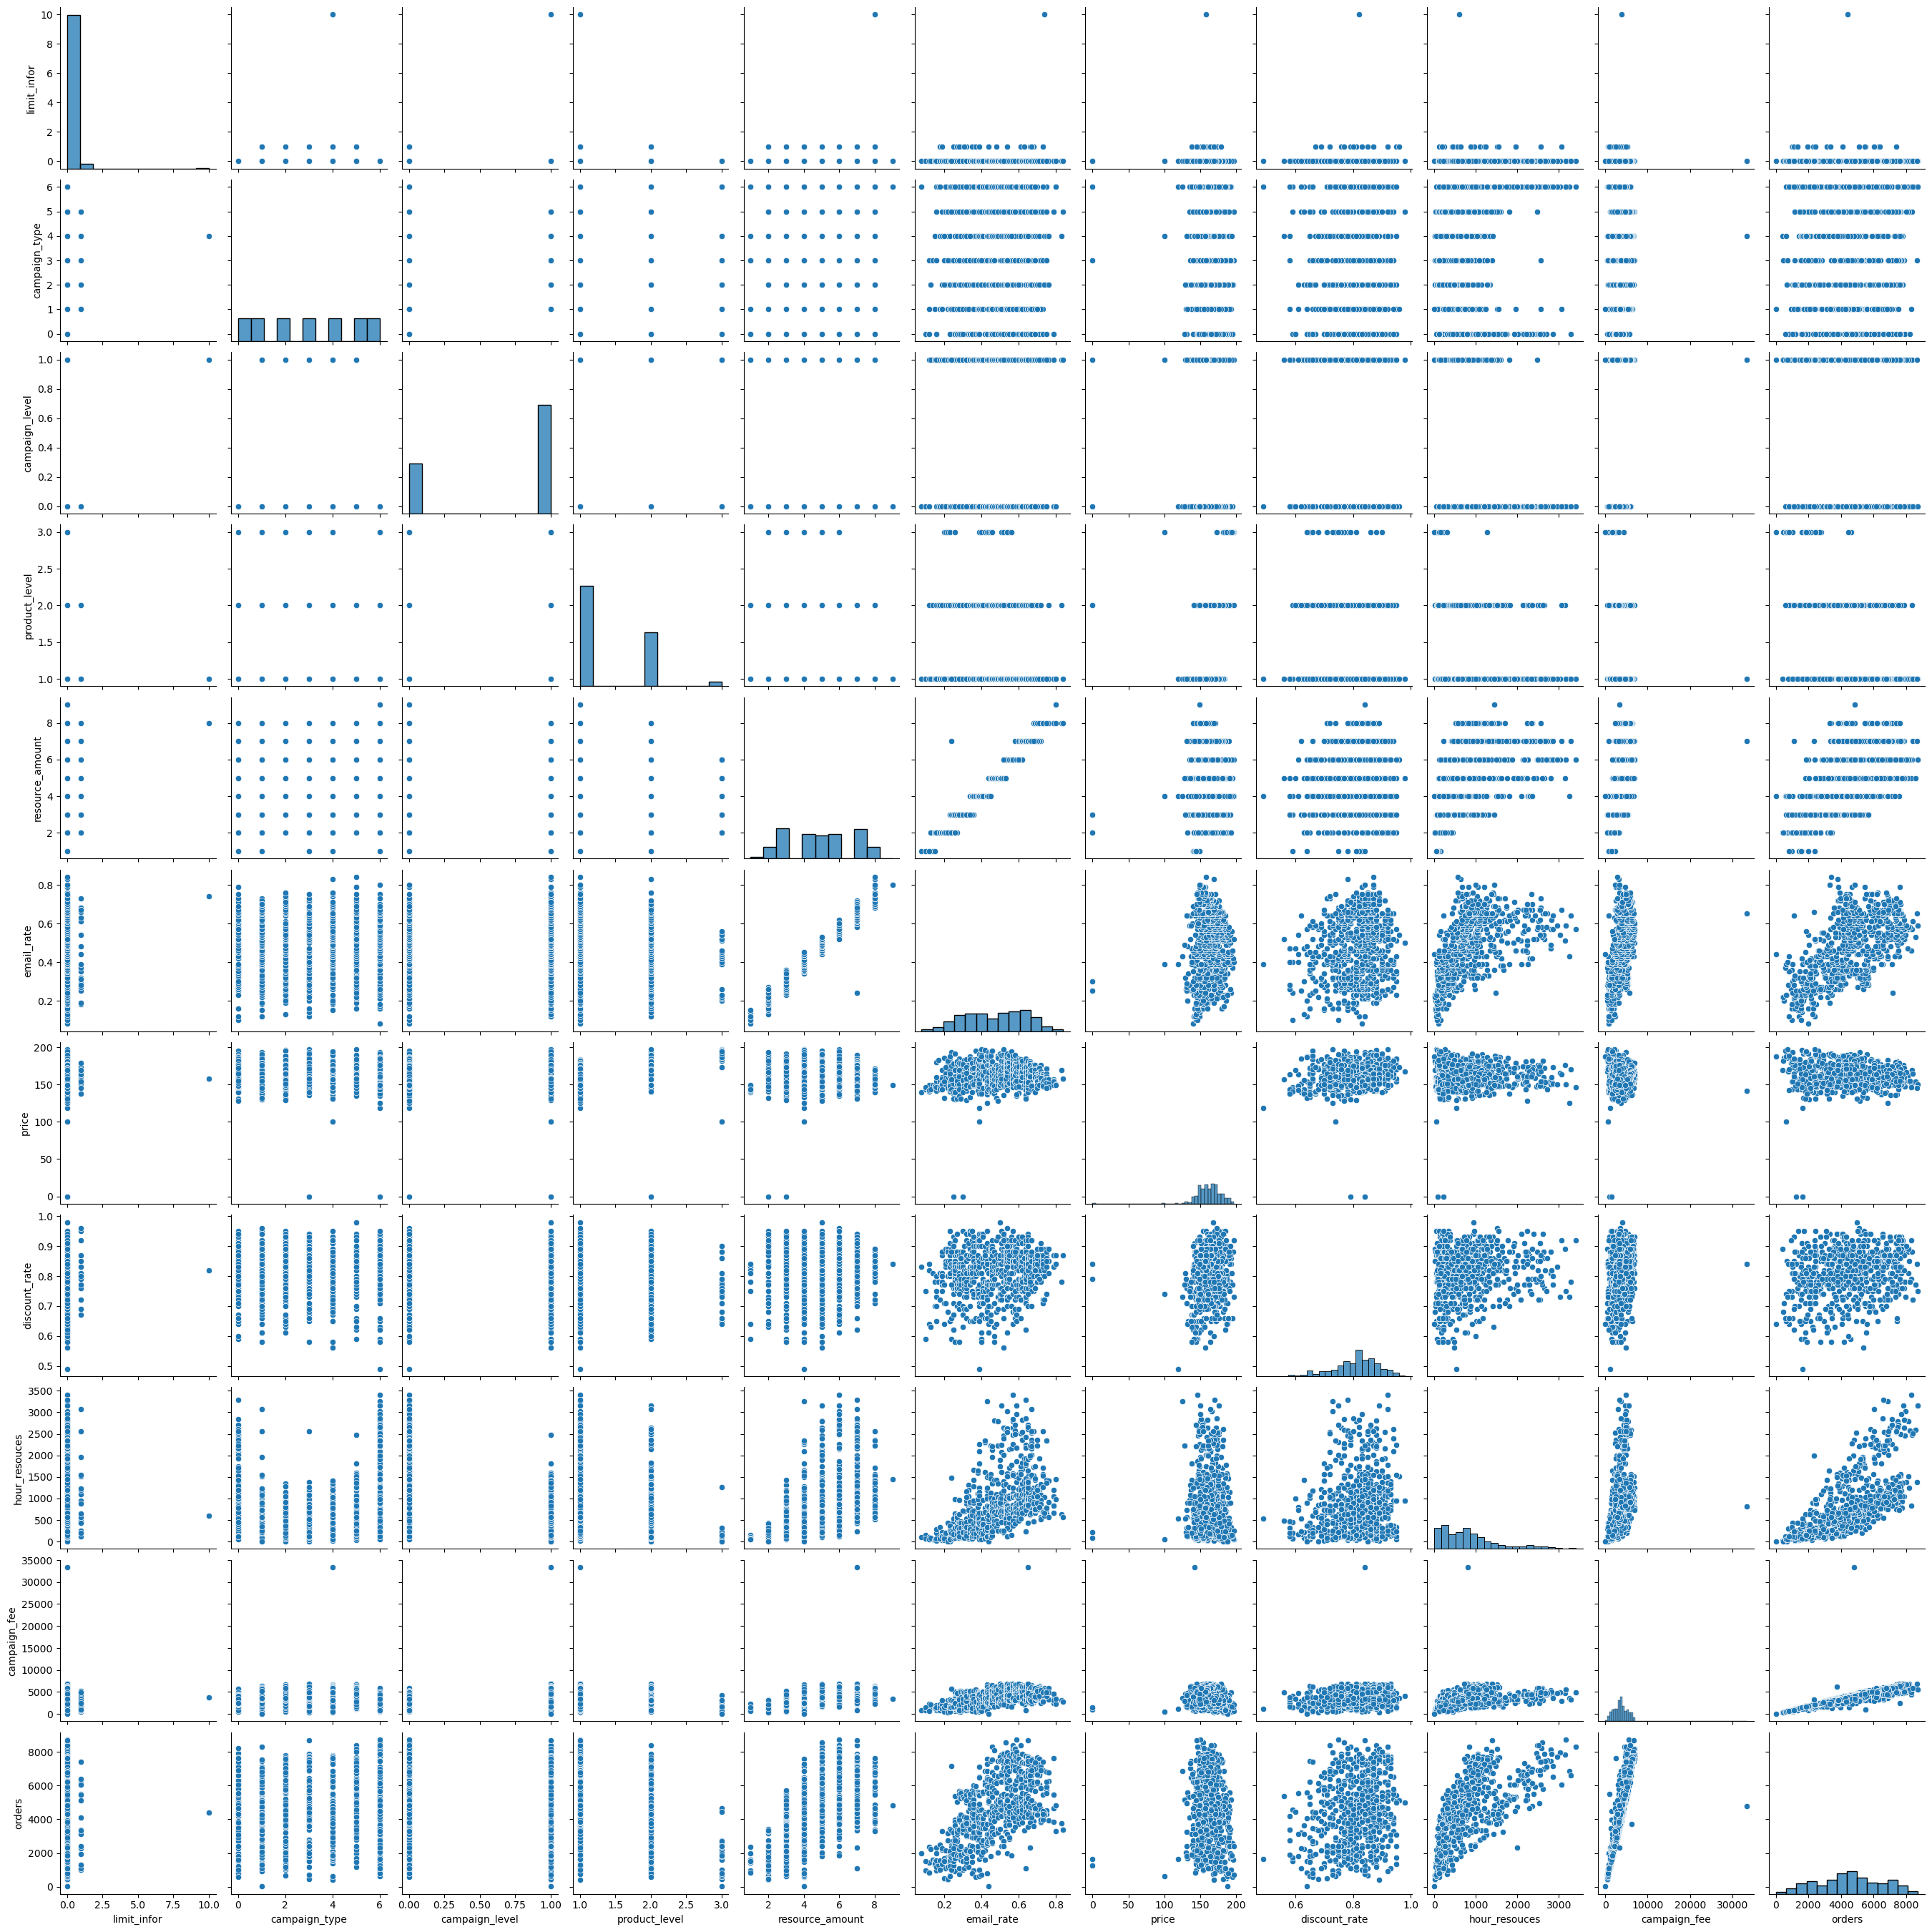

In [8]:
# Pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(df)
plt.show()

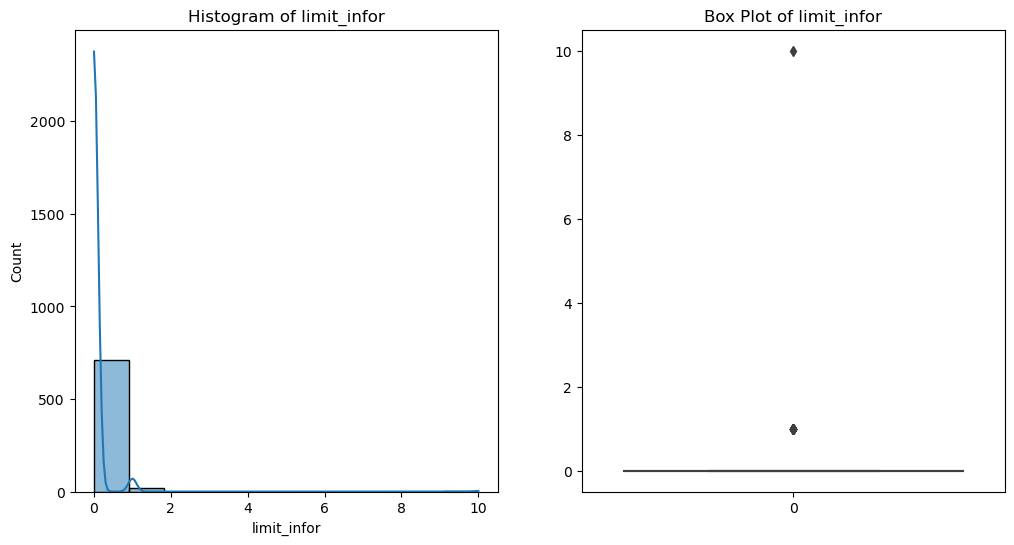

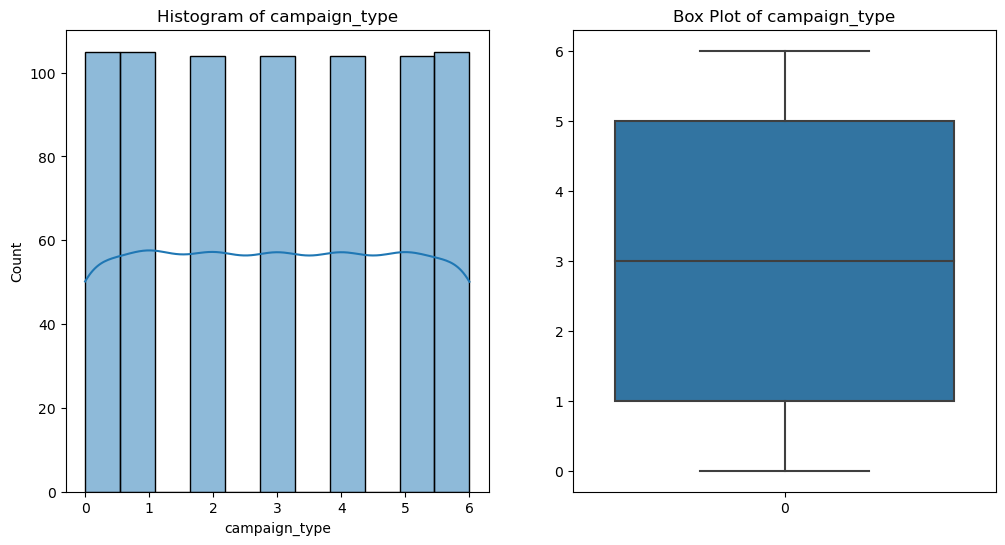

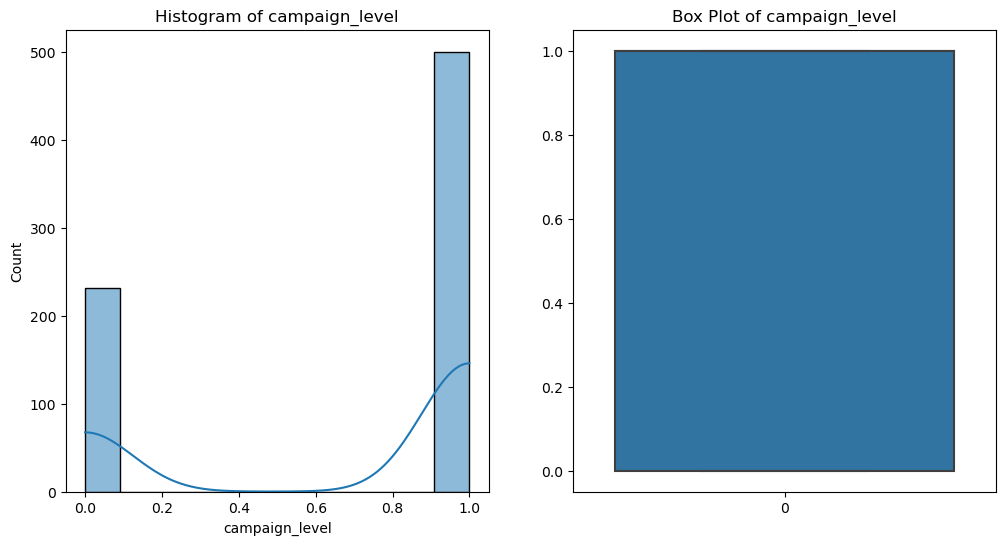

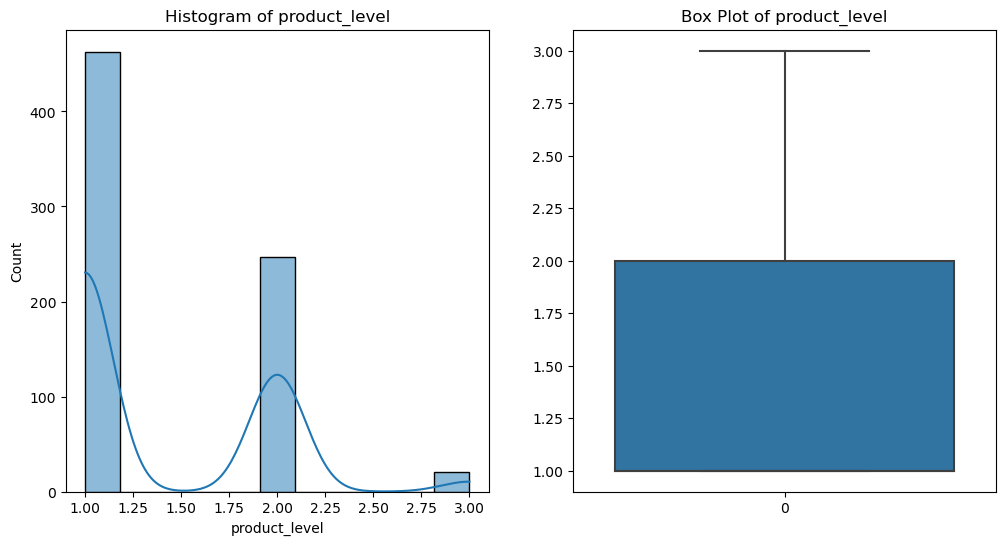

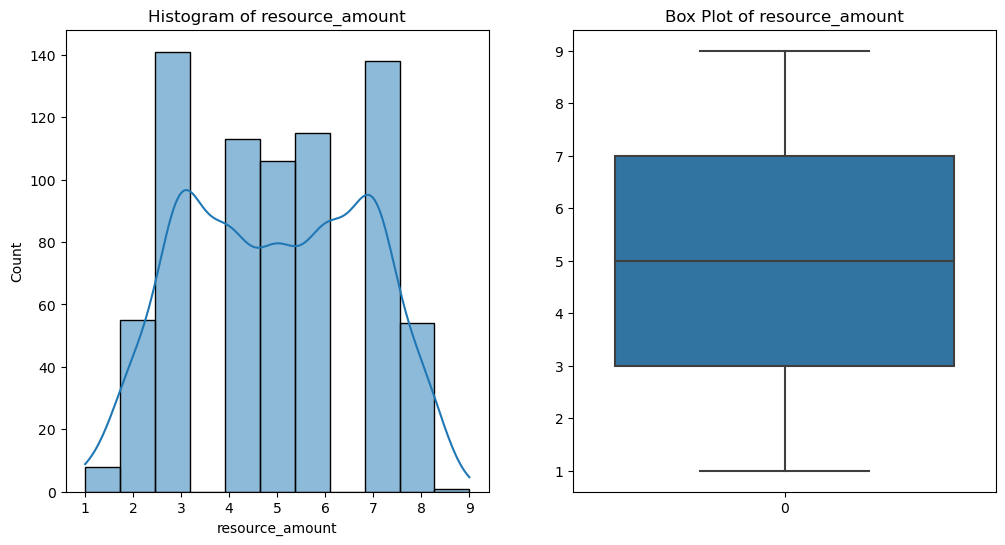

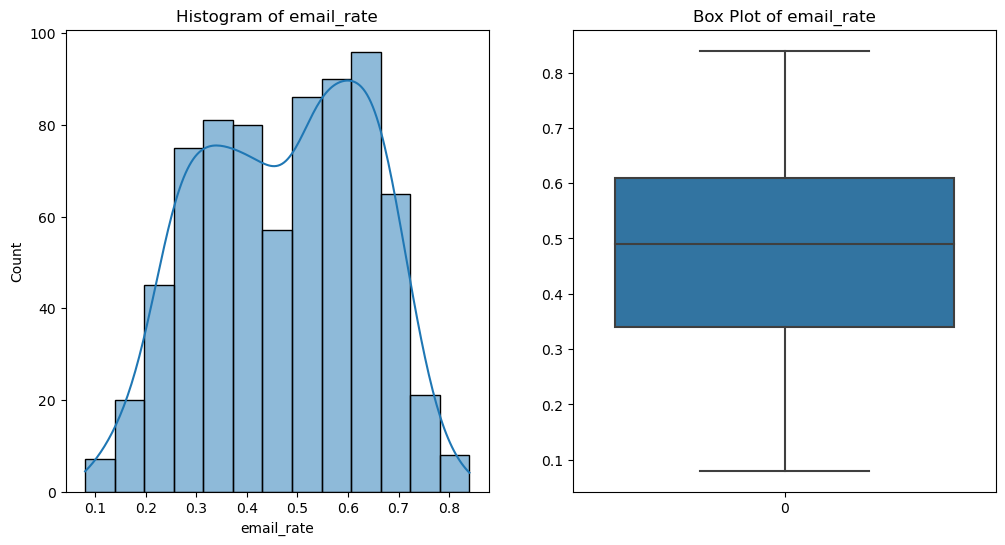

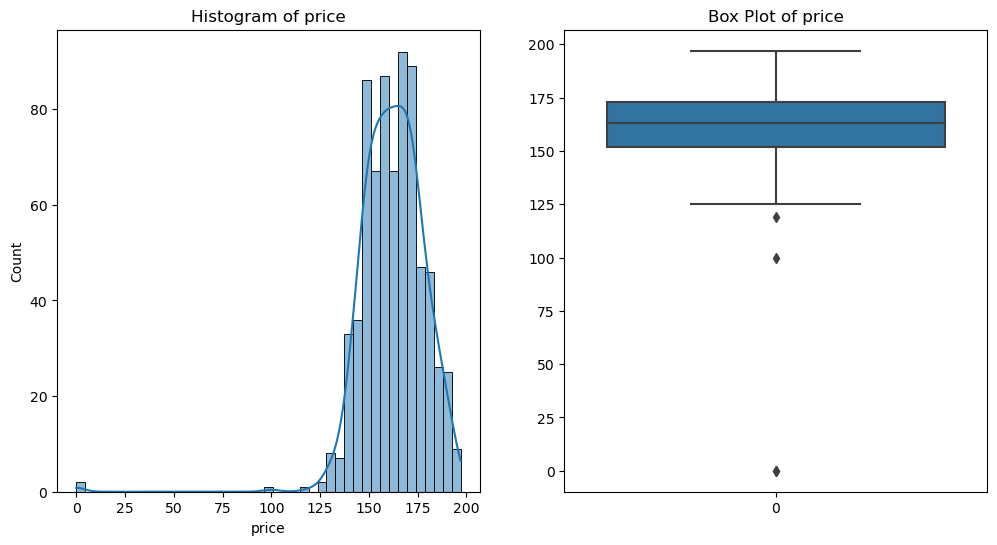

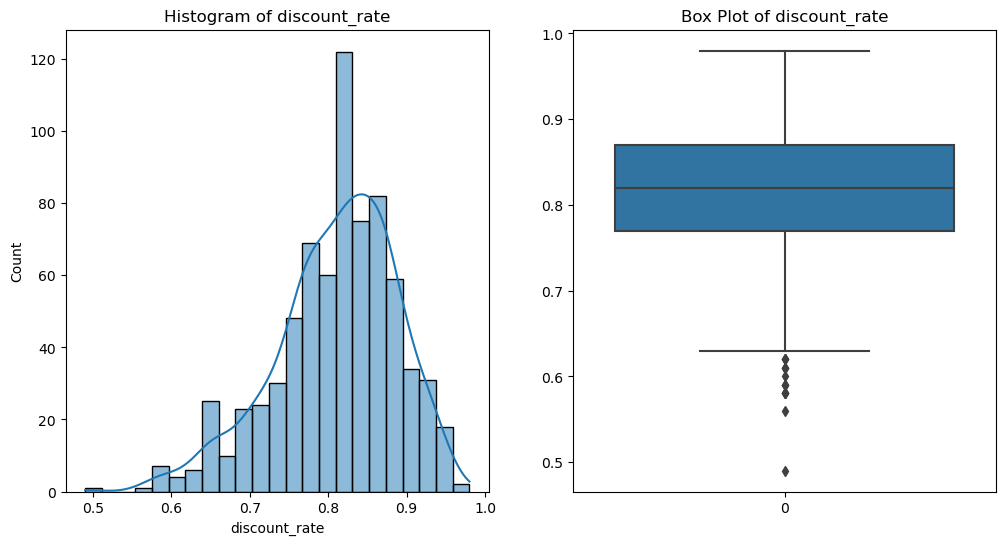

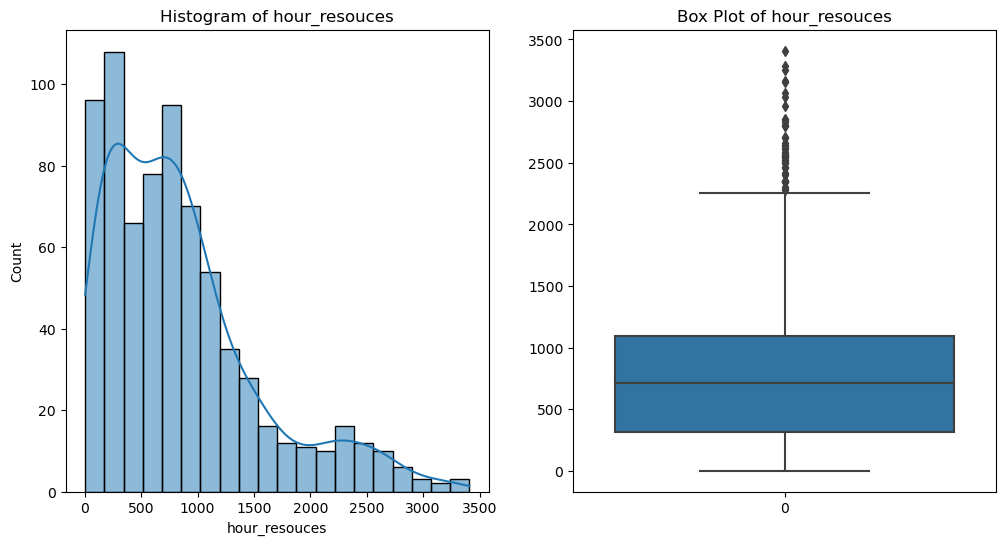

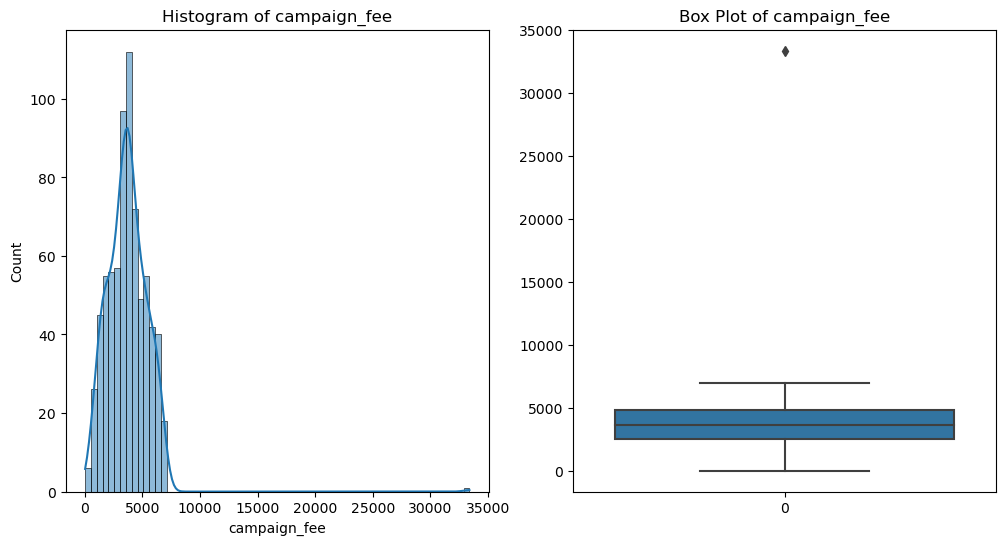

In [9]:
# Histograms and Box Plots
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

for feature in numeric_features:
    if feature != 'orders':
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        sns.histplot(df[feature], kde=True, ax=ax[0])
        sns.boxplot(df[feature], ax=ax[1])
        ax[0].set_title(f'Histogram of {feature}')
        ax[1].set_title(f'Box Plot of {feature}')
        plt.show()

In [10]:
X = df.drop('orders', axis=1)
y = df['orders']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [14]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R²: {r2_lr}')

Linear Regression MSE: 5928820.523851497
Linear Regression R²: -0.5726533972842376


In [15]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree MSE: {mse_dt}')
print(f'Decision Tree R²: {r2_dt}')


Decision Tree MSE: 281191.21768707485
Decision Tree R²: 0.9254124286604655


In [16]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R²: {r2_rf}')


Random Forest MSE: 246378.83069251702
Random Forest R²: 0.9346466125009639


In [17]:
# XGBoost Regressor
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

# Evaluation
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
print(f'XGBoost MSE: {mse_xgbr}')
print(f'XGBoost R²: {r2_xgbr}')


XGBoost MSE: 302396.64866546507
XGBoost R²: 0.9197875673689353


In [18]:
# Collect results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_xgbr],
    'R²': [r2_lr, r2_dt, r2_rf, r2_xgbr]
})

# Display results
results.sort_values(by='MSE')


,Model,MSE,R²
2,Random Forest,2.463788e+05,0.934647
1,Decision Tree,2.811912e+05,0.925412
3,XGBoost,3.023966e+05,0.919788
0,Linear Regression,5.928821e+06,-0.572653
